<h1><center> Part I: Preparation of Data </center></h1>
Datasets used:

- UN General Debate Corpus from 1970 yo 2020, in TXT format. More info [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y).

- More recent 2021 UN speeches https://gadebate.un.org/generaldebate76/en/. These speeches are in PDFs, so we convert them into TXT, rename them following the same format as the Corpus, and save them in the same folder.

**Remark:** we only choose the speeches that have english translations.

- International trade dataset, you can find in http://www.cepii.fr/CEPII/en/bdd_modele/bdd_modele_item.asp?id=37. BACI provides data on bilateral trade flows for 200 countries at the product level (5000 products). A .zip file with the same data is available in Canvas (Modules > Week 2).

- Methodology.csv (full name and 3-code decription of countries)

### The UN Speech dataset

In [1]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 77)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename))
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8600,76,2021,BTN,"Statement by His Excellency Dr Lotay Tshering,..."
8601,76,2021,SRB,"Mr. President,\nMr. Secretary General,\nExcell..."
8602,76,2021,SYR,Statement by\n\nH.E. Fayssal Mekdad\nMinister ...
8603,76,2021,IDN,Please Check Against Delivery\n\nSTATEMENT\n\n...
8604,76,2021,DNK,"The General Debate, 76th United Nations Genera..."


Download the 'UNSD — Methodology.csv' ([link](https://unstats.un.org/unsd/methodology/m49/overview/)) file and load it.

In [2]:
df_codes = pd.read_csv('UNSD_Methodology.csv',sep=';')
df_codes.tail()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x
245,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN
246,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x
247,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x
248,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Wallis and Futuna Islands,876,WF,WLF,NaN,NaN,NaN


Create a merged DataFrame: 

- merge between df_codes and df_speech according to ISO-alpha3 and,

- the new dataframe is composed of columns \["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Least Developed Countries (LDC)", "Session", "Year", "Speech"\]

- the new dataframe will have index as (Year, 'ISO-alpha3 Code')

In [3]:
df_un_merged = pd.merge(df_codes[['Country or Area','Region Name','Sub-region Name','ISO-alpha3 Code','Least Developed Countries (LDC)']],
                 df_speech[['Session', 'Year', 'Speech','ISO-alpha3 Code']],
                 on='ISO-alpha3 Code')
# Set index with year and ISO-alpha3 code
df_un_merged=df_un_merged.set_index(['Year', 'ISO-alpha3 Code'])
df_un_merged.head()

,,Country or Area,Region Name,Sub-region Name,Least Developed Countries (LDC),Session,Speech
Year,ISO-alpha3 Code,,,,,,
1970,DZA,Algeria,Africa,Northern Africa,NaN,25,1. The delegation of Algeria is very pleased ...
1971,DZA,Algeria,Africa,Northern Africa,NaN,26,\n154.\t : It is not only in order to keep up ...
1972,DZA,Algeria,Africa,Northern Africa,NaN,27,"Mr. President, in electing you to preside over..."
1973,DZA,Algeria,Africa,Northern Africa,NaN,28,"﻿121.\tMr. President, since a tradition appear..."
1974,DZA,Algeria,Africa,Northern Africa,NaN,29,"Mr. President, it would be ungracious of the r..."


Import NLTK and download the needed resources for text processing

In [4]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')
from nltk import word_tokenize
from nltk.corpus import stopwords
import string 

# stop words filtering
def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        if (w not in sw):
            no_sw.append(w)
    return no_sw

### The Trade dataset

The trading data is from the year 2020.

In [5]:
# Import trade data (check Readme.txt to understand format)
tradeDataFrame = pd.read_csv('BACI_HS17_V202201/BACI_HS17_Y2020_V202201.csv')

# Import country codes
countryCodes = pd.read_csv("BACI_HS17_V202201/country_codes_V202201.csv", encoding='iso-8859-1')

In [6]:
tradeDataFrame.head()

,t,i,j,k,v,q
0,2020,4,31,251512,27.820,169.800
1,2020,4,32,391000,0.045,0.009
2,2020,4,32,401031,0.164,NA
3,2020,4,32,610120,0.012,0.003
4,2020,4,36,71120,0.727,0.308


In [7]:
# rename the columns in tradeDataFrame for better understanding 
tradeDataFrame['q'] = pd.to_numeric(tradeDataFrame['q'], errors='coerce')
trade_rename = tradeDataFrame.rename({'t': 'year', 'i': 'exporter','j': 'importer', 'k': 'product','v': 'value', 'q': 'quantity'}, axis=1)  
trade_rename.head()

,year,exporter,importer,product,value,quantity
0,2020,4,31,251512,27.820,169.800
1,2020,4,32,391000,0.045,0.009
2,2020,4,32,401031,0.164,NaN
3,2020,4,32,610120,0.012,0.003
4,2020,4,36,71120,0.727,0.308


<h1><center> Part II: Analyses </center></h1>

## 1. Exploratory analysis

How often do countries refer to other countries? 

Hypothesis: if countries trade more with each other, they will refer to the other more often

### Preparing the dataset

In order to obtain the variables of interest (total trade value per country in 2020, and average time each country is mentioned by others in the period of 2017-2021), the datasets are further transformed.

In [8]:
# group by 'exporter'
trade_export = trade_rename.groupby('exporter')['value'].sum().reset_index()
trade_export = trade_export.rename({'exporter': 'country_code', 'value': 'agg_export_value'}, axis=1)  

# group by 'importer'
trade_import = trade_rename.groupby('importer')['value'].sum().reset_index()
trade_import = trade_import.rename({'importer': 'country_code', 'value': 'agg_import_value'}, axis=1)  

trade_export.head()

,country_code,agg_export_value
0,4,1.747570e+06
1,8,2.561119e+06
2,12,1.902503e+07
3,16,1.859334e+04
4,20,9.605653e+04


In [9]:
trade_import.head()

,country_code,agg_import_value
0,4,6.826662e+06
1,8,5.318015e+06
2,12,3.019557e+07
3,16,1.114917e+05
4,20,1.529353e+06


In [10]:
trade_total = pd.merge(trade_export[['country_code','agg_export_value']],
                     trade_import[['country_code', 'agg_import_value']],
                     on = 'country_code')

# total import and export value
trade_total['agg_total_value'] = trade_total['agg_export_value'] + trade_total['agg_import_value']
trade_total.head()

,country_code,agg_export_value,agg_import_value,agg_total_value
0,4,1.747570e+06,6.826662e+06,8.574231e+06
1,8,2.561119e+06,5.318015e+06,7.879134e+06
2,12,1.902503e+07,3.019557e+07,4.922060e+07
3,16,1.859334e+04,1.114917e+05,1.300850e+05
4,20,9.605653e+04,1.529353e+06,1.625409e+06


In [11]:
countryCodes = countryCodes.rename({'iso_3digit_alpha': 'ISO-alpha3 Code'}, axis=1)
countryCodes.head()

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,ISO-alpha3 Code
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND


In [12]:
# merge the trade dataframe with the country code (i.e use ISO-alpha3 Code) 

trade_merge = pd.merge(trade_total[['country_code','agg_total_value']],
                 countryCodes[['country_code','ISO-alpha3 Code']],
                 on='country_code')

trade_merge.tail()

,country_code,agg_total_value,ISO-alpha3 Code
221,862,1.001067e+07,VEN
222,876,3.115459e+04,WLF
223,882,3.822763e+05,WSM
224,887,1.016110e+07,YEM
225,894,1.637949e+07,ZMB


In [13]:
# look at 2020 as the trade data is collected in the Year 2020

df1 = pd.merge(df_codes[['Country or Area','Region Name','Sub-region Name','ISO-alpha3 Code','Least Developed Countries (LDC)']],
                 df_speech[['Session', 'Year', 'Speech','ISO-alpha3 Code']],
                 on='ISO-alpha3 Code')
df1 = df1.set_index('Year')
df_2020 = df1.loc[2020]
df_2020.head()

,Country or Area,Region Name,Sub-region Name,ISO-alpha3 Code,Least Developed Countries (LDC),Session,Speech
Year,,,,,,,
2020,Algeria,Africa,Northern Africa,DZA,NaN,75,"In the name of God, the Merciful, the Compassi..."
2020,Egypt,Africa,Northern Africa,EGY,NaN,75,"Mr President,\nAllow me at the outset to exten..."
2020,Libya,Africa,Northern Africa,LBY,NaN,75,"Mr. President,\nYour Excellences and Honours,\..."
2020,Morocco,Africa,Northern Africa,MAR,NaN,75,"In the name of God, the most gracious, the mos..."
2020,Sudan,Africa,Northern Africa,SDN,x,75,"In the name of God, the most merciful,\nYour M..."


In [14]:
# the combination dataset for the year 2020

df_trade_merged = pd.merge(df_2020,
                 trade_merge[['ISO-alpha3 Code','agg_total_value']],
                 on='ISO-alpha3 Code')

df_trade_merged.head()

,Country or Area,Region Name,Sub-region Name,ISO-alpha3 Code,Least Developed Countries (LDC),Session,Speech,agg_total_value
0,Algeria,Africa,Northern Africa,DZA,NaN,75,"In the name of God, the Merciful, the Compassi...",4.922060e+07
1,Egypt,Africa,Northern Africa,EGY,NaN,75,"Mr President,\nAllow me at the outset to exten...",8.955448e+07
2,Libya,Africa,Northern Africa,LBY,NaN,75,"Mr. President,\nYour Excellences and Honours,\...",1.960517e+07
3,Morocco,Africa,Northern Africa,MAR,NaN,75,"In the name of God, the most gracious, the mos...",7.609963e+07
4,Sudan,Africa,Northern Africa,SDN,x,75,"In the name of God, the most merciful,\nYour M...",1.110192e+07


In [15]:
valuedict = {}
for i in range(len(df_trade_merged)):
    valuedict[df_trade_merged.loc[i]['Country or Area']] = df_trade_merged.loc[i]['agg_total_value']

valuedict

{'Algeria': 49220601.299,
 'Egypt': 89554476.43,
 'Libya': 19605165.557,
 'Morocco': 76099630.839,
 'Sudan': 11101919.033,
 'Tunisia': 29524673.018,
 'Burundi': 1169913.644,
 'Comoros': 416477.88499999995,
 'Djibouti': 5343869.953,
 'Eritrea': 880270.9180000001,
 'Ethiopia': 15753039.996,
 'Kenya': 24450980.486,
 'Madagascar': 5984287.757999999,
 'Malawi': 3682674.964,
 'Mauritius': 6644211.331,
 'Mozambique': 15414598.543000001,
 'Rwanda': 2207668.019,
 'Seychelles': 2801960.76,
 'Somalia': 4249407.021000001,
 'Uganda': 14341381.104,
 'United Republic of Tanzania': 16076559.688000001,
 'Zambia': 16379486.320999999,
 'Zimbabwe': 9211086.723000001,
 'Angola': 28724104.669,
 'Cameroon': 9205928.796,
 'Central African Republic': 380827.131,
 'Chad': 2509436.203,
 'Congo': 10581481.263,
 'Democratic Republic of the Congo': 16675761.918000001,
 'Equatorial Guinea': 3522859.4729999998,
 'Gabon': 6621629.2469999995,
 'Sao Tome and Principe': 132333.05800000002,
 'Botswana': 10533724.022,
 'Es

In [16]:
countrylist = ['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 
               'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 
               'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 
               'bosnia and herzegovina', 'botswana', 'brazil', 'brunei', 'bulgaria', 'burkina faso', 
               'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 
               'chile', 'china', 'colombia', 'comoros', 'congo', 'costa rica', 'croatia', 'cuba', 'cyprus', 
               'czechia', 'côte d’ivoire', "north korea", 
               'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 
               'ecuador', 'egypt', 'el salvador', 'equatorial guinea', 'eritrea', 'estonia', 'eswatini', 
               'ethiopia', 'fiji', 'finland', 'france', 'gabon', 'gambia', 'georgia', 'germany', 'ghana', 
               'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 
               'honduras', 'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq', 
               'ireland', 'israel', 'italy', 'jamaica', 'japan', 'jordan', 'kazakhstan', 'kenya', 'kiribati', 
               'kuwait', 'kyrgyzstan', "laos", 'latvia', 'lebanon', 'lesotho', 
               'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 'madagascar', 'malawi', 'malaysia', 
               'maldives', 'mali', 'malta', 'marshall islands', 'mauritania', 'mauritius', 'mexico', 
               'micronesia', 'monaco', 'mongolia', 'montenegro', 'morocco', 'mozambique', 
               'myanmar', 'namibia', 'nauru', 'nepal', 'netherlands', 'new zealand', 'nicaragua', 'niger', 
               'nigeria', 'north macedonia', 'norway', 'oman', 'pakistan', 'palau', 'panama', 'papua new guinea', 
               'paraguay', 'peru', 'philippines', 'poland', 'portugal', 'qatar', 'south korea', 
               'moldova', 'romania', 'russia', 'rwanda', 'saint kitts and nevis', 
               'saint lucia', 'saint vincent and the grenadines', 'samoa', 'san marino', 'sao tome and principe', 
               'saudi arabia', 'senegal', 'serbia', 'seychelles', 'sierra leone', 'singapore', 'slovakia', 
               'slovenia', 'solomon islands', 'somalia', 'south africa', 'south sudan', 'spain', 'sri lanka', 
               'palestine', 'sudan', 'suriname', 'sweden', 'switzerland', 'syria', 
               'tajikistan', 'thailand', 'timor-leste', 'togo', 'tonga', 'trinidad and tobago', 'tunisia', 
               'turkmenistan', 'tuvalu', 'turkey', 'uganda', 'ukraine', 'united arab emirates', 
               'united kingdom', 'tanzania','united states', 'uruguay', 'uzbekistan', 'vanuatu', 'venezuela',
               'vietnam', 'yemen', 'zambia', 'zimbabwe']

In [17]:
def check_exist(year,code):
    if (year, code) not in df4years.index:
        return 1
    else:
        return 0 
    
countriescode = countryCodes['ISO-alpha3 Code'].values
a = set(countriescode)
codescountry = [x for x in a if pd.notna(x)]

df4years = df_un_merged[df_un_merged['Session'] > 71]

In [18]:
referdict = {}
for country in countrylist:
    referdict[country] = 0
    
for code in codescountry:
    if check_exist(2021, code) == 1:
        continue
    else:     
        text = df4years.loc[2021,code]['Speech']
        text = text.lower()
        words = word_tokenize(text)
        prewords = preprocess(words)

        for country in countrylist:
            x = prewords.count(country)
            if country != df4years.loc[2021,code]['Country or Area']:
                if x > 0:
                    referdict[country] += x
        
    if check_exist(2020, code) == 1:
        continue
    else:     
        text = df4years.loc[2020,code]['Speech']
        text = text.lower()
        words = word_tokenize(text)
        prewords = preprocess(words)

        for country in countrylist:
            x = prewords.count(country)
            if country != df4years.loc[2020,code]['Country or Area']:
                if x > 0:
                    referdict[country] += x
                    
    if check_exist(2019, code) == 1:
        continue
    else:     
        text = df4years.loc[2019,code]['Speech']
        text = text.lower()
        words = word_tokenize(text)
        prewords = preprocess(words)

        for country in countrylist:
            x = prewords.count(country)
            if country != df4years.loc[2019,code]['Country or Area']:
                if x > 0:
                    referdict[country] += x
        
    if check_exist(2018, code) == 1:
        continue
    else:     
        text = df4years.loc[2018,code]['Speech']
        text = text.lower()
        words = word_tokenize(text)
        prewords = preprocess(words)

        for country in countrylist:
            x = prewords.count(country)
            if country != df4years.loc[2018,code]['Country or Area']:
                if x > 0:
                    referdict[country] += x   
    
    if check_exist(2017, code) == 1:
        continue
    else:     
        text = df4years.loc[2017,code]['Speech']
        text = text.lower()
        words = word_tokenize(text)
        prewords = preprocess(words)

        for country in countrylist:
            x = prewords.count(country)
            if country != df4years.loc[2017,code]['Country or Area']:
                if x > 0:
                    referdict[country] += x
    
referdict

{'afghanistan': 312,
 'albania': 89,
 'algeria': 1,
 'andorra': 1,
 'angola': 43,
 'antigua and barbuda': 0,
 'argentina': 15,
 'armenia': 275,
 'australia': 235,
 'austria': 47,
 'azerbaijan': 290,
 'bahamas': 45,
 'bahrain': 14,
 'bangladesh': 121,
 'barbados': 85,
 'belarus': 43,
 'belgium': 35,
 'belize': 132,
 'benin': 1,
 'bhutan': 95,
 'bolivia': 1,
 'bosnia and herzegovina': 0,
 'botswana': 99,
 'brazil': 150,
 'brunei': 9,
 'bulgaria': 87,
 'burkina faso': 0,
 'burundi': 11,
 'cabo verde': 0,
 'cambodia': 67,
 'cameroon': 3,
 'canada': 153,
 'central african republic': 0,
 'chad': 26,
 'chile': 118,
 'china': 328,
 'colombia': 24,
 'comoros': 0,
 'congo': 117,
 'costa rica': 0,
 'croatia': 76,
 'cuba': 303,
 'cyprus': 94,
 'czechia': 0,
 'côte d’ivoire': 0,
 'north korea': 0,
 'democratic republic of the congo': 0,
 'denmark': 81,
 'djibouti': 6,
 'dominica': 101,
 'dominican republic': 0,
 'ecuador': 14,
 'egypt': 27,
 'el salvador': 0,
 'equatorial guinea': 0,
 'eritrea': 64

In [30]:
averagementions = {key: value / 5 for key, value in referdict.items()}
to_remove = ('brunei', 'holy see', 'liechtenstein', 'mali', 'monaco', 'portugal', 'south sudan')
for k in to_remove:
    averagementions.pop(k, None)

In [31]:
valuedict = {k.lower(): v for k, v in valuedict.items()}

In [32]:
print(len(averagementions)) # Avg mentions over 5 years
print(len(valuedict)) # Trade total value

188
188


In [33]:
sortedvalue_dict = {key: value for key, value in sorted(valuedict.items())}
sortedvalue_dict

{'afghanistan': 8574231.082000066,
 'albania': 7879133.995999987,
 'algeria': 49220601.299000055,
 'andorra': 1625409.130999997,
 'angola': 28724104.66899999,
 'antigua and barbuda': 796496.4699999995,
 'argentina': 97149944.40399927,
 'armenia': 7977025.035999946,
 'australia': 457729697.40599287,
 'austria': 327854988.9050019,
 'azerbaijan': 25174341.58800005,
 'bahamas': 6554087.234000013,
 'bahrain': 18170915.90799986,
 'bangladesh': 88283290.7729998,
 'barbados': 2125122.537000008,
 'belarus': 60398249.298000865,
 'belgium': 657230166.2639921,
 'belize': 1379159.1600000006,
 'benin': 5874873.258,
 'bhutan': 1013794.1139999991,
 'bolivia': 14233667.784000017,
 'bosnia and herzegovina': 16659091.897000005,
 'botswana': 10533724.022000013,
 'brazil': 379025479.77100384,
 'bulgaria': 67737251.61499928,
 'burkina faso': 12173775.213999992,
 'burundi': 1169913.6440000008,
 'cabo verde': 1206322.832999998,
 'cambodia': 54319132.25299993,
 'cameroon': 9205928.796000004,
 'canada': 7746722

In [34]:
for key in averagementions.keys():
    if not key in sortedvalue_dict:
        print(key)
        
# here we see that some countries are in both dictionaries, but are written in different words.

In [35]:
# Edit the names of the countries manually and delete the keys that were not in both dictionaries.
valuedict = {'afghanistan': 8574231.082000066, 'albania': 7879133.995999987, 'algeria': 49220601.299000055,
             'andorra': 1625409.130999997, 'angola': 28724104.66899999,'antigua and barbuda': 796496.4699999995,
             'argentina': 97149944.40399927,'armenia': 7977025.035999946,'australia': 457729697.40599287,
             'austria': 327854988.9050019,'azerbaijan': 25174341.58800005,'bahamas': 6554087.234000013,
             'bahrain': 18170915.90799986,'bangladesh': 88283290.7729998,'barbados': 2125122.537000008,
             'belarus': 60398249.298000865,'belgium': 657230166.2639921,'belize': 1379159.1600000006,
             'benin': 5874873.258,'bhutan': 1013794.1139999991,'bolivia': 14233667.784000017,
             'bosnia and herzegovina': 16659091.897000005,'botswana': 10533724.022000013,
             'brazil': 379025479.77100384,'bulgaria': 67737251.61499928,'burkina faso': 12173775.213999992,
             'burundi': 1169913.6440000008,'cabo verde': 1206322.832999998,'cambodia': 54319132.25299993,
             'cameroon': 9205928.796000004,'canada': 774672212.7719944,
             'central african republic': 380827.13100000017,'chad': 2509436.2029999983,'chile': 131166230.7390002,
             'china': 4189242737.6680403,'colombia': 74954171.9020002,'comoros': 416477.8850000003,
             'congo': 10581481.26299999,'costa rica': 27673217.291999973,'croatia': 44017161.975999944,
             'cuba': 4392487.531000008,'cyprus': 15204247.92099993,'czechia': 349345287.22900367,
             'côte d’ivoire': 19442747.98099991,"north korea": 683438.9529999988,
             'democratic republic of the congo': 16675761.918000005,'denmark': 199386073.40599746,
             'djibouti': 5343869.953000025,'dominica': 220666.43100000016,'dominican republic': 29349242.12899998,
             'ecuador': 39192313.46100004,'egypt': 89554476.42999905,'el salvador': 15478419.72999999,
             'equatorial guinea': 3522859.473000001,'eritrea': 880270.9180000012,'estonia': 35817659.36800009,
             'eswatini': 3537005.3589999974,'ethiopia': 15753039.995999947,'fiji': 2049004.0880000098,
             'finland': 134825634.02999988,'france': 1049613457.6260033,'gabon': 6621629.24700001,
             'gambia': 1753053.6159999971,'georgia': 12782722.51499994,'germany': 2417559566.259009,
             'ghana': 28679956.14800001,'greece': 91759383.82899943,'grenada': 212732.47300000035,
             'guatemala': 30518351.41300004,'guinea': 16317597.156999964,'guinea-bissau': 446350.8749999999,
             'guyana': 5846026.141000016,'haiti': 4622147.811999993,'honduras': 16428777.818000028,
             'hungary': 227671829.7400031,'iceland': 11112763.93700001,'india': 657054080.2290025,
             'indonesia': 322517549.1000042,'iran': 36110528.46100021,'iraq': 104671181.40300009,
             'ireland': 274110176.09099853,'israel': 118154611.89199984,'italy': 912140450.1440089,
             'jamaica': 6130632.358000022,'japan': 1238615596.451993,'jordan': 28751233.375999875,
             'kazakhstan': 94501308.26099864,'kenya': 24450980.485999774,'kiribati': 275577.56099999964,
             'kuwait': 68597375.21799998,'kyrgyzstan': 10441083.180999951,"laos": 12116463.287000004,
             'latvia': 35352545.05300028,'lebanon': 17323955.51399993,'lesotho': 2203381.8969999985,
             'liberia': 10470505.485000066,'libya': 19605165.556999944,'lithuania': 63851089.268999636,
             'luxembourg': 38010250.38500006,'madagascar': 5984287.7580000125,'malawi': 3682674.9640000183,
             'malaysia': 465604560.585003,'maldives': 1593822.946999996,'malta': 16202247.520000089,
             'marshall islands': 12678231.75999996,'mauritania': 7642433.670000013,'mauritius': 6644211.33100004,
             'mexico': 766109417.2679987,'micronesia': 253968.50299999974,'mongolia': 13979206.068999995,
             'montenegro': 3382393.134000009,'morocco': 76099630.83899978,'mozambique': 15414598.543000046,
             'myanmar': 45701975.3360001,'namibia': 12681602.369999982,'nauru': 197846.664,'nepal': 9064675.527999999,
             'netherlands': 1025090928.372968,'new zealand': 75695738.0669996,'nicaragua': 11984928.822999999,
             'niger': 5201443.997999996,'nigeria': 75740598.30200021,'north macedonia': 16321679.698000008,
             'norway': 170353759.60399973,'oman': 54974751.19599964,'pakistan': 75649789.0719994,
             'palau': 102654.49099999965,'panama': 33981883.40899979,'papua new guinea': 13170511.09699997,
             'paraguay': 18611229.482999988,'peru': 76188889.40499985,'philippines': 186921237.81100163,
             'poland': 525723746.1580026,'qatar': 78170312.79699995,'south korea': 979672441.8039885,
             'moldova': 8711780.863000076,'romania': 164723329.40500048,'russia': 553963051.9719995,
             'rwanda': 2207668.0189999966,'saint kitts and nevis': 298272.4799999993,
             'saint lucia': 1083726.9890000008,'saint vincent and the grenadines': 268608.75299999997,
             'samoa': 382276.3269999998,'san marino': 426294.64599999954,'sao tome and principe': 132333.0579999998,
             'saudi arabia': 276346220.2119998,'senegal': 15234422.139000088,'serbia': 48005126.675999686,
             'seychelles': 2801960.76,'sierra leone': 1681921.0469999975,'singapore': 566115759.5380001,
             'slovakia': 167665595.17399973,'slovenia': 77797428.52599864,'solomon islands': 836071.3369999999,
             'somalia': 4249407.021000012,'south africa': 180203326.76999697,'spain': 616498138.0889935,
             'sri lanka': 27789725.29200001,'palestine': 946227.1329999998,'sudan': 11101919.032999985,
             'suriname': 3422399.2049999954,'sweden': 294999648.8309399,'switzerland': 590367086.9309924,
             'syria': 4764938.429000007,'tajikistan': 4786171.980000003,'thailand': 446759798.1729977,
             'timor-leste': 721420.7209999998,'togo': 11375082.87100003,'tonga': 151267.95399999994,
             'trinidad and tobago': 10972970.923999991,'tunisia': 29524673.017999955,
             'turkmenistan': 10259479.586000001,'tuvalu': 72920.637,'turkey': 386187649.9520029,
             'uganda': 14341381.103999846,'ukraine': 108946977.96100083,'united arab emirates': 436199725.23800033,
             'united kingdom': 988821825.3279953,'tanzania': 16076559.687999902,'united states': 3588420199.080042,
             'uruguay': 16044816.71700006,'uzbekistan': 35236802.128000095,'vanuatu': 373106.0650000003,
             'venezuela': 10010668.032999992,'vietnam': 570767352.7229999,'yemen': 10161095.236999955,
             'zambia': 16379486.320999928,'zimbabwe': 9211086.722999994}

In [36]:
for key in averagementions.keys():
    if not key in valuedict:
        print(key)

In [37]:
tradekeys = list(valuedict.keys())
tradevalues = list(valuedict.values())
mentionskeys = averagementions.keys()
mentionsvalues = list(averagementions.values())

### Analysis

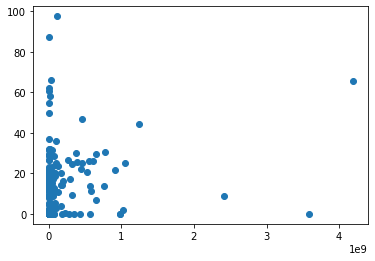

In [38]:
# Plot mentions and trade values
import matplotlib.pyplot as plt

plt.scatter(tradevalues, mentionsvalues)
plt.show()

In [39]:
# Correlation coefficient of mentions and trade value
np.corrcoef(tradevalues, mentionsvalues)

array([[1.        , 0.14486428],
       [0.14486428, 1.        ]])

#### Visualize trade values and mentions on map

In [40]:
import matplotlib.pyplot as plt
import geopandas as gpd

world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [41]:
# Prepare the dataset
# Merge the geopandas dataframe with the trade dataframe to get corresponding geometry and total trade value
world_map_merge = world_map.merge(df_trade_merged, left_on = 'iso_a3', right_on = 'ISO-alpha3 Code')

# Add a column for 5-year average mentions
avg_mention = dict((k.capitalize(), v) for k, v in averagementions.items())
world_map_merge = world_map_merge.set_index('name')
world_map_merge['avg_mention'] = pd.Series(avg_mention)
world_map_merge.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry,Country or Area,Region Name,Sub-region Name,ISO-alpha3 Code,Least Developed Countries (LDC),Session,Speech,agg_total_value,avg_mention
name,,,,,,,,,,,,,,
Fiji,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,Oceania,Melanesia,FJI,NaN,75,President of the 75th Session;\nSecretary-Gene...,2.049004e+06,21.4
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",United Republic of Tanzania,Africa,Sub-Saharan Africa,TZA,x,75,I am pleased to deliver this statement on beha...,1.607656e+07,21.2
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,Americas,Northern America,CAN,NaN,75,"Mr. President, fellow delegates, my friends.\n...",7.746722e+08,30.6
United States of America,328239523.0,North America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,Americas,Northern America,USA,NaN,75,It is my profound honor to address the United ...,3.588420e+09,NaN
Kazakhstan,18513930.0,Asia,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,Asia,Central Asia,KAZ,NaN,75,"Mr. Secretary-General,\nExcellencies,\nDisting...",9.450131e+07,18.8


In [42]:
world_map_merge = world_map_merge.reset_index()
world_map_merge['avg_mention'] = world_map_merge['avg_mention'].fillna(0)
world_map_merge.head()

,name,pop_est,continent,iso_a3,gdp_md_est,geometry,Country or Area,Region Name,Sub-region Name,ISO-alpha3 Code,Least Developed Countries (LDC),Session,Speech,agg_total_value,avg_mention
0,Fiji,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,Oceania,Melanesia,FJI,NaN,75,President of the 75th Session;\nSecretary-Gene...,2.049004e+06,21.4
1,Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",United Republic of Tanzania,Africa,Sub-Saharan Africa,TZA,x,75,I am pleased to deliver this statement on beha...,1.607656e+07,21.2
2,Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,Americas,Northern America,CAN,NaN,75,"Mr. President, fellow delegates, my friends.\n...",7.746722e+08,30.6
3,United States of America,328239523.0,North America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,Americas,Northern America,USA,NaN,75,It is my profound honor to address the United ...,3.588420e+09,0.0
4,Kazakhstan,18513930.0,Asia,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,Asia,Central Asia,KAZ,NaN,75,"Mr. Secretary-General,\nExcellencies,\nDisting...",9.450131e+07,18.8


In [43]:
plt.set_cmap('GnBu')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '2020 Total trade value - Worldwide')

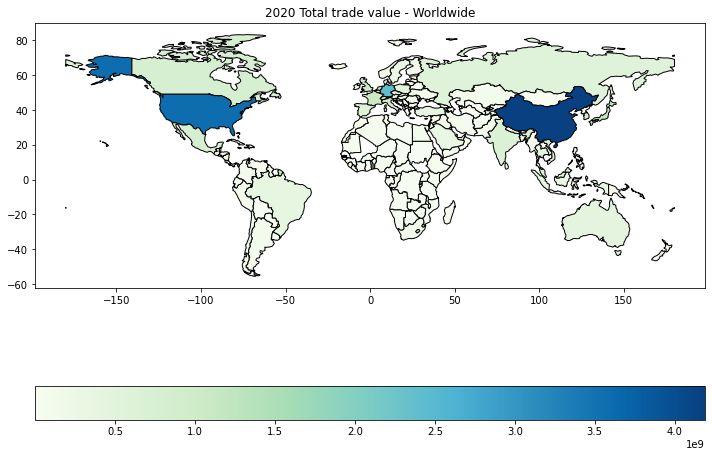

In [44]:
# Plot total trade values
fig, ax = plt.subplots(figsize = (12,12))
ax = world_map_merge.plot(column = 'agg_total_value', ax=ax, edgecolor="black",
                          legend = 'True', legend_kwds={'orientation': "horizontal"})
ax.set_title('2020 Total trade value - Worldwide')

Text(0.5, 1.0, 'Average mentions 2017-2021 - Worldwide')

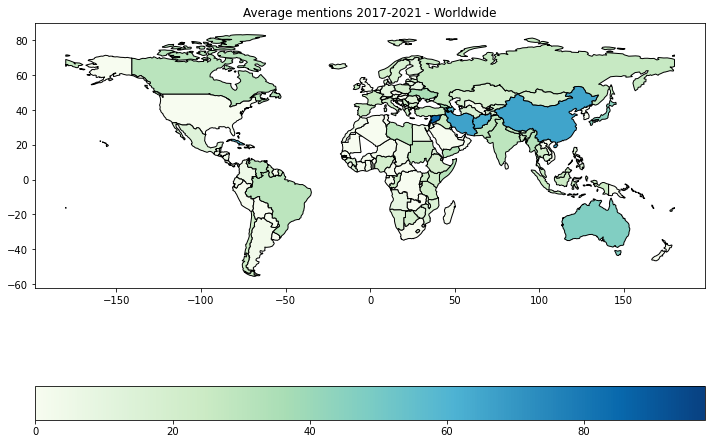

In [45]:
# Plot average mentions
fig, ax = plt.subplots(figsize = (12,12))
ax = world_map_merge.plot(column = 'avg_mention', ax=ax, edgecolor="black",
                          legend = 'True', legend_kwds={'orientation': "horizontal"})
ax.set_title('Average mentions 2017-2021 - Worldwide')

In [46]:
# Filter for Middle-eastern countries (labelled 'Western Asia')
world_map_me = world_map_merge[world_map_merge['Sub-region Name'] == 'Western Asia']

# Replace NaN in United Arab Emirates' mention with 0, as in the original dictionary
world_map_me['avg_mention'] = world_map_me['avg_mention'].fillna(0)

world_map_me = world_map_me.reset_index()
world_map_me.head()

/Users/vanh/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,index,name,pop_est,continent,iso_a3,gdp_md_est,geometry,Country or Area,Region Name,Sub-region Name,ISO-alpha3 Code,Least Developed Countries (LDC),Session,Speech,agg_total_value,avg_mention
0,70,Israel,9053300.0,Asia,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",Israel,Asia,Western Asia,ISR,NaN,75,"Mr. President,\nLadies and gentlemen,\nThe Mid...",1.181546e+08,97.6
1,71,Lebanon,6855713.0,Asia,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",Lebanon,Asia,Western Asia,LBN,NaN,75,"Your Excellency, Mr. Volkan Bozkir, President ...",1.732396e+07,32.2
2,73,Palestine,4685306.0,Asia,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",State of Palestine,Asia,Western Asia,PSE,NaN,75,"In the name of God, the Merciful,\nH.E. Mr. Vo...",9.462271e+05,50.0
3,77,Jordan,10101694.0,Asia,JOR,44502,"POLYGON ((35.54567 32.39399, 35.71992 32.70919...",Jordan,Asia,Western Asia,JOR,NaN,75,"In the name of God, the Compassionate, the Mer...",2.875123e+07,5.6
4,78,United Arab Emirates,9770529.0,Asia,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",United Arab Emirates,Asia,Western Asia,ARE,NaN,75,"Mr. President,\nAt the outset, I would like to...",4.361997e+08,0.0


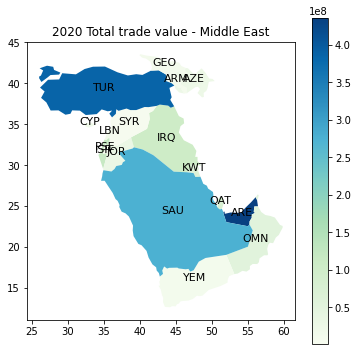

In [47]:
# Plot total trade values
fig, ax = plt.subplots(figsize = (6,6))
ax = world_map_me.plot(column = 'agg_total_value', ax=ax, legend = 'True')
ax.set_title('2020 Total trade value - Middle East')

world_map_me.apply(lambda x: ax.annotate(text = x['iso_a3'], xy = x.geometry.centroid.coords[0],
                                         ha='center', color = 'black', size=11), axis=1);

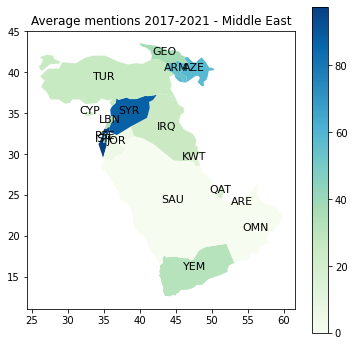

In [48]:
# Plot average mentions
fig, ax = plt.subplots(figsize = (6,6))
plt.set_cmap('GnBu')

ax = world_map_me.plot(column = 'avg_mention', ax=ax, legend = 'True')
ax.set_title('Average mentions 2017-2021 - Middle East')

world_map_me.apply(lambda x: ax.annotate(text = x['iso_a3'], xy = x.geometry.centroid.coords[0],
                                         ha = 'center', color = 'black', size=11), axis=1);

## 2. Predictive analysis
Can we use classifier X to classify UN speeches to corresponding continents?

### Preparing the dataset

In [49]:
df_sorted = df_un_merged.sort_index(level='Year')
df_sorted.head()

Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   

                     Least Developed Countries (LDC)  Session  \
Year ISO-alpha3 Code                                            
1970 ALB                                         NaN       25   
     ARG                                         NaN       25   
     AUS                                         NaN       25   
     AUT                                         NaN       25   
     BEL                                         NaN       25   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 ALB              33: May I first convey to our President the co...  
     ARG              177.\t : It is a fortunate coincidence that pr...  
     AUS              100.\t  It is a pleasure for me to extend to y...  
     AUT              155.\t  May I begin by expressing to Ambassado...  
     BEL              176. No doubt each of us, before coming up to ...

### Model training

In [50]:
df_train = df_sorted.loc(axis=0)[1970:2010,]
df_test = df_sorted.loc(axis=0)[2011:2021,]

## Modeling
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())])

X_train = df_train['Speech']
Y_train = df_train['Region Name']

text_clf.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

In [51]:
text_clf.get_params()

{'memory': None,
 'steps': [('vect', CountVectorizer()), ('clf', MultinomialNB())],
 'verbose': False,
 'vect': CountVectorizer(),
 'clf': MultinomialNB(),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': None,
 'vect__vocabulary': None,
 'clf__alpha': 1.0,
 'clf__class_prior': None,
 'clf__fit_prior': True}

### Model Validation

In [52]:
# Calculate accuracy on the test data
X_test = df_test['Speech']
Y_test = df_test['Region Name']

predicted = text_clf.predict(X_test)
print(np.mean(predicted == Y_test))

0.8740272373540856


[[464  22  12   5  54]
 [  0 338   2   0  27]
 [  1  16 424  10  58]
 [  3  34   3 419  12]
 [  0   0   0   0 152]]


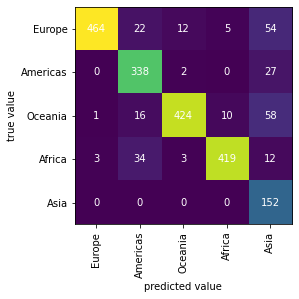

In [53]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test, predicted)
print(mat)

region = list(pd.unique(df_train.loc[:,'Region Name']))

fig, ax = plt.subplots()

ax.imshow(mat, cmap = 'viridis', interpolation = 'nearest')
ax.set_xlabel('predicted value')
ax.set_ylabel('true value');
ax.set_xticks(np.arange(len(region)))
ax.set_yticks(np.arange(len(region)))
ax.set_xticklabels(region, rotation='vertical')
ax.set_yticklabels(region)

# Loop over data to create text annotations.
for i in range(len(mat)):
    for j in range(len(mat)):
        text = ax.text(j, i, mat[i, j],
                       ha="center", va="center", color="w")
plt.show()

### Parameter tuning

In [54]:
# Define parameter grid and perform GridSearch

from sklearn.model_selection import GridSearchCV

parameter = {'clf__alpha':(1,1e-1,1e-2, 1e-3),
             'vect__ngram_range':[(1,1),(1,2),(1,3)] 
}
gs1 = GridSearchCV(text_clf, parameter, cv = 5)
gs1 = gs1.fit(X_train[:500],Y_train[:500])

In [55]:
# Validation of the best model
predicted_eva = gs1.best_estimator_.predict(X_test)

print('Best parameters:{}'.format(gs1.best_params_))
print('Best score on train set:{:.2f}'.format(gs1.best_score_))
print('test set best score is:{:2f} '.format(np.mean(predicted_eva == Y_test)))

Best parameters:{'clf__alpha': 0.1, 'vect__ngram_range': (1, 1)}
Best score on train set:0.90
test set best score is:0.695039 


[[419  69  68   1   0]
 [  4 353  10   0   0]
 [  7  58 434  10   0]
 [ 40 144 130 156   1]
 [  3  55  27   0  67]]


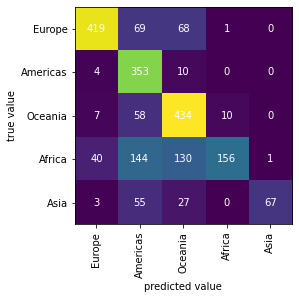

In [56]:
# Confusion matrix

mat = confusion_matrix(Y_test, predicted_eva)
print(mat)

region=list(pd.unique(df_train.loc[:,'Region Name']))
fig, ax = plt.subplots()
ax.imshow(mat, cmap='viridis', interpolation='nearest')
ax.set_xlabel('predicted value')
ax.set_ylabel('true value');
ax.set_xticks(np.arange(len(region)))
ax.set_yticks(np.arange(len(region)))
ax.set_xticklabels(region, rotation='vertical')
ax.set_yticklabels(region)

# Loop over data to create text annotations.
for i in range(len(mat)):
    for j in range(len(mat)):
        text = ax.text(j, i, mat[i, j],
                       ha="center", va="center", color="w")
plt.show()

### Test pipeline with tf_idf

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

text_clf1 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=1))])

text_clf1.fit(X_train, Y_train)

# create a test set -> this is a set different than the train set

predicted_ = text_clf1.predict(X_test)

# in out many examples if our model guessing the right post category?
np.mean(predicted_ == Y_test)

0.441147859922179